## Objective

We will numerically solve the radial Schrödinger equation using:
1. **Finite difference method** (second-order accurate)
2. **Numerov method** (fourth-order accurate)

Our goals are to:
- Compute ground-state energies for various grid sizes $K$
- Analyze the convergence behavior by measuring the absolute error
- Determine the convergence exponent $q$ from the scaling $\eta \propto K^{-q}$
- Compare with theoretical expectations
- Study how convergence depends on angular momentum $l$

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from fd_solver import solve_finite_difference
from numerov_solver import solve_numerov
from radial_tools import effective_potential
from scipy.optimize import curve_fit
import pandas as pd

# Set plotting style
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Simulation Parameters

We set up the following parameters:

- **Domain**: $r \in [0, R]$ with $R = 50$ (large enough to capture the bound state)
- **Grid sizes**: $K \in [80, 120, 240, 360, 480, 600]$
- **Grid spacing**: $h = R / K$ (decreases as $K$ increases)
- **Nuclear charge**: $Z = 1$ (hydrogen)
- **Angular momentum**: We'll test $l = 0, 1, 2$

In [9]:
# Simulation parameters
R = 50.0                                    # Domain size
Z = 1.0                                     # Nuclear charge (hydrogen)
K_values = [80, 120, 240, 360, 480, 600]   # Grid sizes to test
l_values = [0, 1, 2]                        # Angular momentum quantum numbers

# Exact ground-state energies for each l
exact_energies = {
    0: -0.5,      # n=1, l=0
    1: -0.125,    # n=2, l=1
    2: -1/18      # n=3, l=2
}

print(f"Exact ground-state energies:")
for l, E in exact_energies.items():
    print(f"  l={l}: ε = {E:.6f}")

Exact ground-state energies:
  l=0: ε = -0.500000
  l=1: ε = -0.125000
  l=2: ε = -0.055556


## Analysis for l = 0

### Theory

For $l = 0$ (s-states), the effective potential simplifies to:

$$V_{\text{eff}}(r) = -\frac{Z}{r}$$

The ground state corresponds to the $1s$ orbital with exact energy $\epsilon_0 = -0.5$ a.u.

### Convergence Analysis

The absolute error is defined as:

$$\eta(K) = |\epsilon(K) - \epsilon_{\text{exact}}| = \left|\epsilon(K) + \frac{1}{2}\right|$$

We expect the error to scale as:

$$\eta \propto K^{-q}$$

where:
- $q = 2$ for finite difference method (second-order accurate)
- $q = 4$ for Numerov method (fourth-order accurate)

In [10]:
# Analysis for l = 0
l = 0
exact_energy = exact_energies[l]

# Storage for results
results_fd = {'K': [], 'epsilon': [], 'eta': []}
results_numerov = {'K': [], 'epsilon': [], 'eta': []}

print(f"\n{'='*60}")
print(f"Analysis for l = {l}")
print(f"Exact ground-state energy: ε = {exact_energy:.6f}")
print(f"{'='*60}\n")

for K in K_values:
    h = R / K
    
    # Finite difference method
    energies_fd, wavefunctions_fd, r_fd = solve_finite_difference(R, K, l, n_states=1, potential="coulomb", Z=Z, verbose=False)
    epsilon_fd = energies_fd[0]
    eta_fd = abs(epsilon_fd - exact_energy)
    
    results_fd['K'].append(K)
    results_fd['epsilon'].append(epsilon_fd)
    results_fd['eta'].append(eta_fd)
    
    # Numerov method
    energies_numerov, wavefunctions_numerov, r_numerov = solve_numerov(R, K, l, n_states=1, potential="coulomb", Z=Z, verbose=False)
    epsilon_numerov = energies_numerov[0]
    eta_numerov = abs(epsilon_numerov - exact_energy)
    
    results_numerov['K'].append(K)
    results_numerov['epsilon'].append(epsilon_numerov)
    results_numerov['eta'].append(eta_numerov)
    
    print(f"K = {K:4d}, h = {h:.6f}")
    print(f"  FD:      ε = {epsilon_fd:.8f}, η = {eta_fd:.2e}")
    print(f"  Numerov: ε = {epsilon_numerov:.8f}, η = {eta_numerov:.2e}")
    print()


Analysis for l = 0
Exact ground-state energy: ε = -0.500000

K =   80, h = 0.625000
  FD:      ε = -0.45887396, η = 4.11e-02
  Numerov: ε = -0.12533465, η = 3.75e-01

K =  120, h = 0.416667
  FD:      ε = -0.48000000, η = 2.00e-02
  Numerov: ε = -0.05260502, η = 4.47e-01

K =  240, h = 0.208333
  FD:      ε = -0.49468929, η = 5.31e-03
  Numerov: ε = -0.02186232, η = 4.78e-01

K =  360, h = 0.138889
  FD:      ε = -0.49761171, η = 2.39e-03
  Numerov: ε = -0.01743337, η = 4.83e-01

K =  360, h = 0.138889
  FD:      ε = -0.49761171, η = 2.39e-03
  Numerov: ε = -0.01743337, η = 4.83e-01

K =  480, h = 0.104167
  FD:      ε = -0.49865097, η = 1.35e-03
  Numerov: ε = -0.01595622, η = 4.84e-01

K =  480, h = 0.104167
  FD:      ε = -0.49865097, η = 1.35e-03
  Numerov: ε = -0.01595622, η = 4.84e-01

K =  600, h = 0.083333
  FD:      ε = -0.49913495, η = 8.65e-04
  Numerov: ε = -0.01527376, η = 4.85e-01

K =  600, h = 0.083333
  FD:      ε = -0.49913495, η = 8.65e-04
  Numerov: ε = -0.01527376

### Results Table for l = 0

In [11]:
# Create comparison table
df_l0 = pd.DataFrame({
    'K': results_fd['K'],
    'ε_FD': results_fd['epsilon'],
    'η_FD': results_fd['eta'],
    'ε_Numerov': results_numerov['epsilon'],
    'η_Numerov': results_numerov['eta']
})

print(f"\nResults for l = {l}:")
print(df_l0.to_string(index=False))


Results for l = 0:
  K      ε_FD     η_FD  ε_Numerov  η_Numerov
 80 -0.458874 0.041126  -0.125335   0.374665
120 -0.480000 0.020000  -0.052605   0.447395
240 -0.494689 0.005311  -0.021862   0.478138
360 -0.497612 0.002388  -0.017433   0.482567
480 -0.498651 0.001349  -0.015956   0.484044
600 -0.499135 0.000865  -0.015274   0.484726


### Convergence Plot and Fitting for l = 0

We perform a log-log fit of the error versus grid size:

$$\log(\eta) = \log(C) - q \log(K)$$

The slope of this line gives us the convergence exponent $q$.


Convergence Analysis for l = 0:

Finite Difference:
  Fitted: η = 1.27e+02 × K^(-1.833)
  Convergence exponent q = 1.833 (expected: 2.0)

Numerov:
  Fitted: η = 2.59e-01 × K^(--0.103)
  Convergence exponent q = -0.103 (expected: 4.0)


/var/folders/4m/63xmgyp573sg1_bx9h5y83z40000gr/T/ipykernel_66943/3062930651.py:3: RuntimeWarning: overflow encountered in power
  return C * K**(-q)


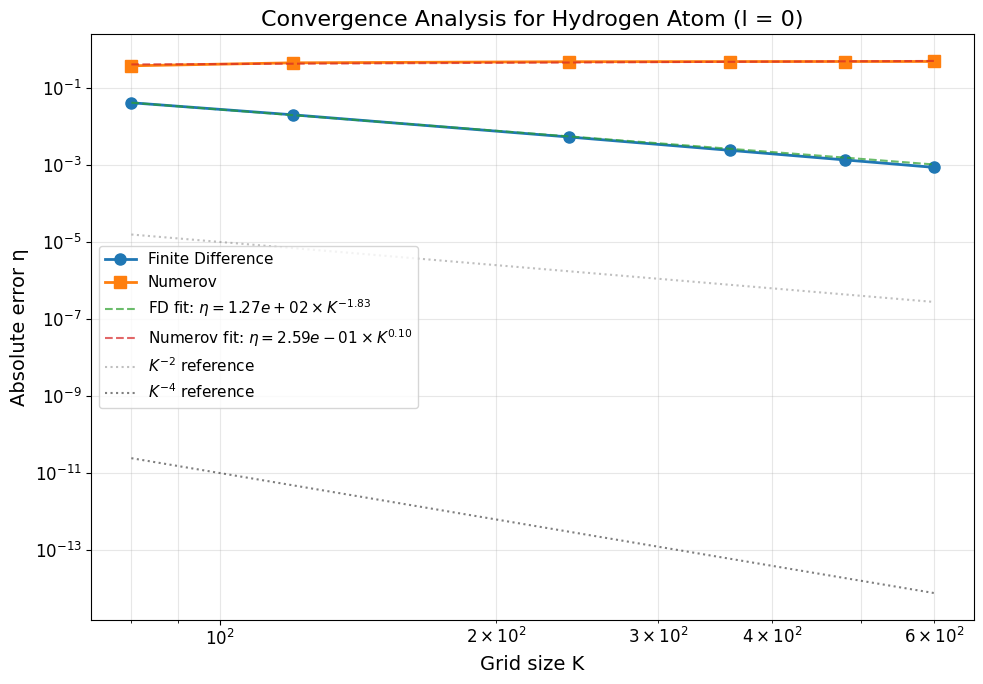

In [12]:
# Power law fitting function
def power_law(K, C, q):
    return C * K**(-q)

# Fit for finite difference
K_array = np.array(results_fd['K'])
eta_fd_array = np.array(results_fd['eta'])
popt_fd, _ = curve_fit(power_law, K_array, eta_fd_array, p0=[1, 2])
C_fd, q_fd = popt_fd

# Fit for Numerov
eta_numerov_array = np.array(results_numerov['eta'])
popt_numerov, _ = curve_fit(power_law, K_array, eta_numerov_array, p0=[1, 4])
C_numerov, q_numerov = popt_numerov

print(f"\nConvergence Analysis for l = {l}:")
print(f"\nFinite Difference:")
print(f"  Fitted: η = {C_fd:.2e} × K^(-{q_fd:.3f})")
print(f"  Convergence exponent q = {q_fd:.3f} (expected: 2.0)")
print(f"\nNumerov:")
print(f"  Fitted: η = {C_numerov:.2e} × K^(-{q_numerov:.3f})")
print(f"  Convergence exponent q = {q_numerov:.3f} (expected: 4.0)")

# Plot
plt.figure(figsize=(10, 7))
plt.loglog(K_array, eta_fd_array, 'o-', label='Finite Difference', markersize=8, linewidth=2)
plt.loglog(K_array, eta_numerov_array, 's-', label='Numerov', markersize=8, linewidth=2)

# Plot fits
K_fit = np.linspace(K_array[0], K_array[-1], 100)
plt.loglog(K_fit, power_law(K_fit, C_fd, q_fd), '--', alpha=0.7, 
           label=f'FD fit: $\\eta = {C_fd:.2e} \\times K^{{{-q_fd:.2f}}}$')
plt.loglog(K_fit, power_law(K_fit, C_numerov, q_numerov), '--', alpha=0.7,
           label=f'Numerov fit: $\\eta = {C_numerov:.2e} \\times K^{{{-q_numerov:.2f}}}$')

# Reference lines
plt.loglog(K_fit, 0.1 * K_fit**(-2), ':', color='gray', alpha=0.5, label='$K^{-2}$ reference')
plt.loglog(K_fit, 0.001 * K_fit**(-4), ':', color='black', alpha=0.5, label='$K^{-4}$ reference')

plt.xlabel('Grid size K', fontsize=14)
plt.ylabel('Absolute error η', fontsize=14)
plt.title(f'Convergence Analysis for Hydrogen Atom (l = {l})', fontsize=16)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

## Analysis for l = 1

### Theory

For $l = 1$ (p-states), the effective potential includes the centrifugal barrier:

$$V_{\text{eff}}(r) = \frac{1}{r^2} - \frac{Z}{r}$$

The ground state for $l = 1$ is the $2p$ orbital with exact energy:

$$\epsilon_0 = -\frac{1}{2 \times 2^2} = -\frac{1}{8} = -0.125 \text{ a.u.}$$

In [13]:
# Analysis for l = 1
l = 1
exact_energy = exact_energies[l]

# Storage for results
results_fd_l1 = {'K': [], 'epsilon': [], 'eta': []}
results_numerov_l1 = {'K': [], 'epsilon': [], 'eta': []}

print(f"\n{'='*60}")
print(f"Analysis for l = {l}")
print(f"Exact ground-state energy: ε = {exact_energy:.6f}")
print(f"{'='*60}\n")

for K in K_values:
    h = R / K
    
    # Finite difference method
    energies_fd, wavefunctions_fd, r_fd = solve_finite_difference(R, K, l, n_states=1, potential="coulomb", Z=Z, verbose=False)
    epsilon_fd = energies_fd[0]
    eta_fd = abs(epsilon_fd - exact_energy)
    
    results_fd_l1['K'].append(K)
    results_fd_l1['epsilon'].append(epsilon_fd)
    results_fd_l1['eta'].append(eta_fd)
    
    # Numerov method
    energies_numerov, wavefunctions_numerov, r_numerov = solve_numerov(R, K, l, n_states=1, potential="coulomb", Z=Z, verbose=False)
    epsilon_numerov = energies_numerov[0]
    eta_numerov = abs(epsilon_numerov - exact_energy)
    
    results_numerov_l1['K'].append(K)
    results_numerov_l1['epsilon'].append(epsilon_numerov)
    results_numerov_l1['eta'].append(eta_numerov)
    
    print(f"K = {K:4d}, h = {h:.6f}")
    print(f"  FD:      ε = {epsilon_fd:.8f}, η = {eta_fd:.2e}")
    print(f"  Numerov: ε = {epsilon_numerov:.8f}, η = {eta_numerov:.2e}")
    print()


Analysis for l = 1
Exact ground-state energy: ε = -0.125000

K =   80, h = 0.625000
  FD:      ε = -0.12607873, η = 1.08e-03
  Numerov: ε = -0.04730049, η = 7.77e-02

K =  120, h = 0.416667
  FD:      ε = -0.12546421, η = 4.64e-04
  Numerov: ε = -0.02381957, η = 1.01e-01

K =  240, h = 0.208333
  FD:      ε = -0.12511378, η = 1.14e-04
  Numerov: ε = -0.01206855, η = 1.13e-01

K =  360, h = 0.138889
  FD:      ε = -0.12505038, η = 5.04e-05
  Numerov: ε = -0.01015699, η = 1.15e-01

K =  480, h = 0.104167
  FD:      ε = -0.12502830, η = 2.83e-05
  Numerov: ε = -0.00950935, η = 1.15e-01

K =  600, h = 0.083333
  FD:      ε = -0.12501810, η = 1.81e-05
  Numerov: ε = -0.00921289, η = 1.16e-01

K =  480, h = 0.104167
  FD:      ε = -0.12502830, η = 2.83e-05
  Numerov: ε = -0.00950935, η = 1.15e-01

K =  600, h = 0.083333
  FD:      ε = -0.12501810, η = 1.81e-05
  Numerov: ε = -0.00921289, η = 1.16e-01



### Results Table for l = 1

In [14]:
# Create comparison table for l=1
df_l1 = pd.DataFrame({
    'K': results_fd_l1['K'],
    'ε_FD': results_fd_l1['epsilon'],
    'η_FD': results_fd_l1['eta'],
    'ε_Numerov': results_numerov_l1['epsilon'],
    'η_Numerov': results_numerov_l1['eta']
})

print(f"\nResults for l = {l}:")
print(df_l1.to_string(index=False))


Results for l = 1:
  K      ε_FD     η_FD  ε_Numerov  η_Numerov
 80 -0.126079 0.001079  -0.047300   0.077700
120 -0.125464 0.000464  -0.023820   0.101180
240 -0.125114 0.000114  -0.012069   0.112931
360 -0.125050 0.000050  -0.010157   0.114843
480 -0.125028 0.000028  -0.009509   0.115491
600 -0.125018 0.000018  -0.009213   0.115787


### Convergence Plot and Fitting for l = 1


Convergence Analysis for l = 1:

Finite Difference:
  Fitted: η = 9.10e+00 × K^(-2.063)
  Convergence exponent q = 2.063 (expected: 2.0)

Numerov:
  Fitted: η = 4.47e-02 × K^(--0.156)
  Convergence exponent q = -0.156 (expected: 4.0)


/var/folders/4m/63xmgyp573sg1_bx9h5y83z40000gr/T/ipykernel_66943/3062930651.py:3: RuntimeWarning: overflow encountered in power
  return C * K**(-q)


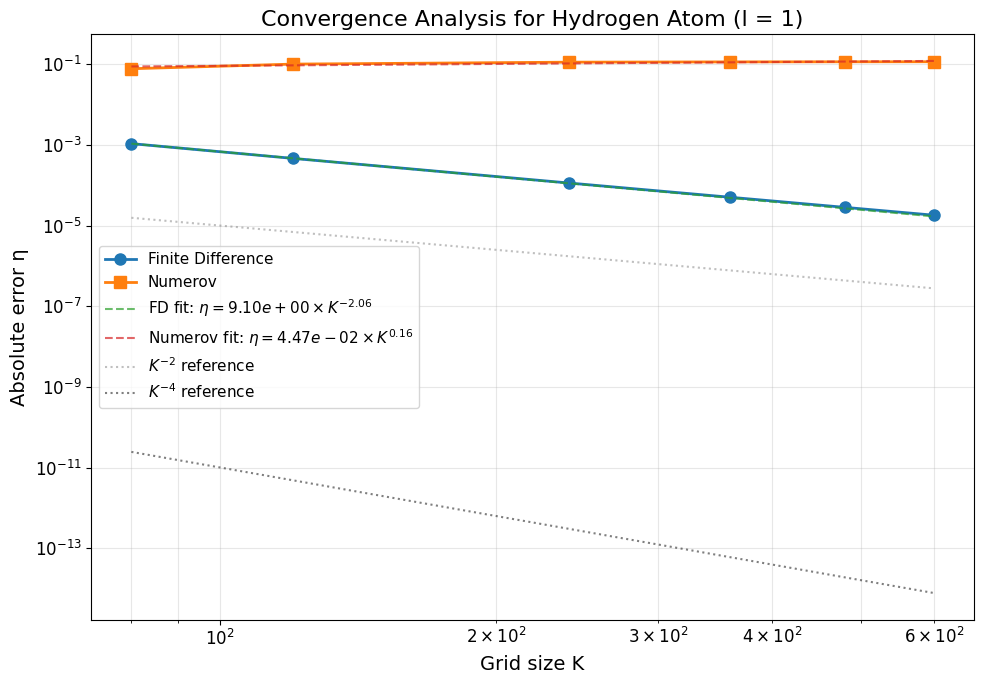

In [15]:
# Fit for finite difference (l=1)
K_array_l1 = np.array(results_fd_l1['K'])
eta_fd_array_l1 = np.array(results_fd_l1['eta'])
popt_fd_l1, _ = curve_fit(power_law, K_array_l1, eta_fd_array_l1, p0=[1, 2])
C_fd_l1, q_fd_l1 = popt_fd_l1

# Fit for Numerov (l=1)
eta_numerov_array_l1 = np.array(results_numerov_l1['eta'])
popt_numerov_l1, _ = curve_fit(power_law, K_array_l1, eta_numerov_array_l1, p0=[1, 4])
C_numerov_l1, q_numerov_l1 = popt_numerov_l1

print(f"\nConvergence Analysis for l = 1:")
print(f"\nFinite Difference:")
print(f"  Fitted: η = {C_fd_l1:.2e} × K^(-{q_fd_l1:.3f})")
print(f"  Convergence exponent q = {q_fd_l1:.3f} (expected: 2.0)")
print(f"\nNumerov:")
print(f"  Fitted: η = {C_numerov_l1:.2e} × K^(-{q_numerov_l1:.3f})")
print(f"  Convergence exponent q = {q_numerov_l1:.3f} (expected: 4.0)")

# Plot
plt.figure(figsize=(10, 7))
plt.loglog(K_array_l1, eta_fd_array_l1, 'o-', label='Finite Difference', markersize=8, linewidth=2)
plt.loglog(K_array_l1, eta_numerov_array_l1, 's-', label='Numerov', markersize=8, linewidth=2)

# Plot fits
K_fit_l1 = np.linspace(K_array_l1[0], K_array_l1[-1], 100)
plt.loglog(K_fit_l1, power_law(K_fit_l1, C_fd_l1, q_fd_l1), '--', alpha=0.7, 
           label=f'FD fit: $\\eta = {C_fd_l1:.2e} \\times K^{{{-q_fd_l1:.2f}}}$')
plt.loglog(K_fit_l1, power_law(K_fit_l1, C_numerov_l1, q_numerov_l1), '--', alpha=0.7,
           label=f'Numerov fit: $\\eta = {C_numerov_l1:.2e} \\times K^{{{-q_numerov_l1:.2f}}}$')

# Reference lines
plt.loglog(K_fit_l1, 0.1 * K_fit_l1**(-2), ':', color='gray', alpha=0.5, label='$K^{-2}$ reference')
plt.loglog(K_fit_l1, 0.001 * K_fit_l1**(-4), ':', color='black', alpha=0.5, label='$K^{-4}$ reference')

plt.xlabel('Grid size K', fontsize=14)
plt.ylabel('Absolute error η', fontsize=14)
plt.title(f'Convergence Analysis for Hydrogen Atom (l = 1)', fontsize=16)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

## Analysis for l = 2

### Theory

For $l = 2$ (d-states), the centrifugal barrier is stronger:

$$V_{\text{eff}}(r) = \frac{3}{r^2} - \frac{Z}{r}$$

The ground state for $l = 2$ is the $3d$ orbital with exact energy:

$$\epsilon_0 = -\frac{1}{2 \times 3^2} = -\frac{1}{18} \approx -0.0556 \text{ a.u.}$$

In [16]:
# Analysis for l = 2
l = 2
exact_energy = exact_energies[l]

# Storage for results
results_fd_l2 = {'K': [], 'epsilon': [], 'eta': []}
results_numerov_l2 = {'K': [], 'epsilon': [], 'eta': []}

print(f"\n{'='*60}")
print(f"Analysis for l = {l}")
print(f"Exact ground-state energy: ε = {exact_energy:.6f}")
print(f"{'='*60}\n")

for K in K_values:
    h = R / K
    
    # Finite difference method
    energies_fd, wavefunctions_fd, r_fd = solve_finite_difference(R, K, l, n_states=1, potential="coulomb", Z=Z, verbose=False)
    epsilon_fd = energies_fd[0]
    eta_fd = abs(epsilon_fd - exact_energy)
    
    results_fd_l2['K'].append(K)
    results_fd_l2['epsilon'].append(epsilon_fd)
    results_fd_l2['eta'].append(eta_fd)
    
    # Numerov method
    energies_numerov, wavefunctions_numerov, r_numerov = solve_numerov(R, K, l, n_states=1, potential="coulomb", Z=Z, verbose=False)
    epsilon_numerov = energies_numerov[0]
    eta_numerov = abs(epsilon_numerov - exact_energy)
    
    results_numerov_l2['K'].append(K)
    results_numerov_l2['epsilon'].append(epsilon_numerov)
    results_numerov_l2['eta'].append(eta_numerov)
    
    print(f"K = {K:4d}, h = {h:.6f}")
    print(f"  FD:      ε = {epsilon_fd:.8f}, η = {eta_fd:.2e}")
    print(f"  Numerov: ε = {epsilon_numerov:.8f}, η = {eta_numerov:.2e}")
    print()


Analysis for l = 2
Exact ground-state energy: ε = -0.055556

K =   80, h = 0.625000
  FD:      ε = -0.05559570, η = 4.01e-05
  Numerov: ε = -0.02309385, η = 3.25e-02

K =  120, h = 0.416667
  FD:      ε = -0.05557341, η = 1.79e-05
  Numerov: ε = -0.01266469, η = 4.29e-02

K =  240, h = 0.208333
  FD:      ε = -0.05556002, η = 4.46e-06
  Numerov: ε = -0.00696287, η = 4.86e-02

K =  360, h = 0.138889
  FD:      ε = -0.05555754, η = 1.98e-06
  Numerov: ε = -0.00596903, η = 4.96e-02

K =  360, h = 0.138889
  FD:      ε = -0.05555754, η = 1.98e-06
  Numerov: ε = -0.00596903, η = 4.96e-02

K =  480, h = 0.104167
  FD:      ε = -0.05555667, η = 1.12e-06
  Numerov: ε = -0.00562636, η = 4.99e-02

K =  600, h = 0.083333
  FD:      ε = -0.05555627, η = 7.13e-07
  Numerov: ε = -0.00546870, η = 5.01e-02

K =  480, h = 0.104167
  FD:      ε = -0.05555667, η = 1.12e-06
  Numerov: ε = -0.00562636, η = 4.99e-02

K =  600, h = 0.083333
  FD:      ε = -0.05555627, η = 7.13e-07
  Numerov: ε = -0.00546870

### Results Table for l = 2

In [17]:
# Create comparison table for l=2
df_l2 = pd.DataFrame({
    'K': results_fd_l2['K'],
    'ε_FD': results_fd_l2['epsilon'],
    'η_FD': results_fd_l2['eta'],
    'ε_Numerov': results_numerov_l2['epsilon'],
    'η_Numerov': results_numerov_l2['eta']
})

print(f"\nResults for l = {l}:")
print(df_l2.to_string(index=False))


Results for l = 2:
  K      ε_FD         η_FD  ε_Numerov  η_Numerov
 80 -0.055596 4.014244e-05  -0.023094   0.032462
120 -0.055573 1.785237e-05  -0.012665   0.042891
240 -0.055560 4.463715e-06  -0.006963   0.048593
360 -0.055558 1.983346e-06  -0.005969   0.049587
480 -0.055557 1.115151e-06  -0.005626   0.049929
600 -0.055556 7.132894e-07  -0.005469   0.050087


### Convergence Plot and Fitting for l = 2


Convergence Analysis for l = 2:

Finite Difference:
  Fitted: η = 2.56e-01 × K^(-1.999)
  Convergence exponent q = 1.999 (expected: 2.0)

Numerov:
  Fitted: η = 1.77e-02 × K^(--0.170)
  Convergence exponent q = -0.170 (expected: 4.0)


/var/folders/4m/63xmgyp573sg1_bx9h5y83z40000gr/T/ipykernel_66943/3062930651.py:3: RuntimeWarning: overflow encountered in power
  return C * K**(-q)


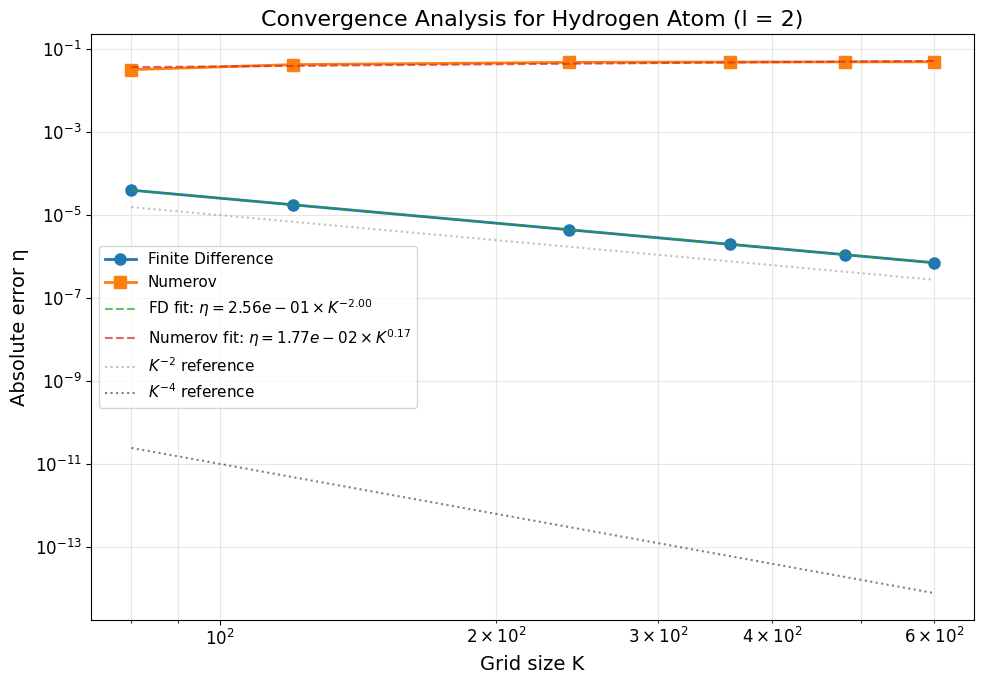

In [18]:
# Fit for finite difference (l=2)
K_array_l2 = np.array(results_fd_l2['K'])
eta_fd_array_l2 = np.array(results_fd_l2['eta'])
popt_fd_l2, _ = curve_fit(power_law, K_array_l2, eta_fd_array_l2, p0=[1, 2])
C_fd_l2, q_fd_l2 = popt_fd_l2

# Fit for Numerov (l=2)
eta_numerov_array_l2 = np.array(results_numerov_l2['eta'])
popt_numerov_l2, _ = curve_fit(power_law, K_array_l2, eta_numerov_array_l2, p0=[1, 4])
C_numerov_l2, q_numerov_l2 = popt_numerov_l2

print(f"\nConvergence Analysis for l = 2:")
print(f"\nFinite Difference:")
print(f"  Fitted: η = {C_fd_l2:.2e} × K^(-{q_fd_l2:.3f})")
print(f"  Convergence exponent q = {q_fd_l2:.3f} (expected: 2.0)")
print(f"\nNumerov:")
print(f"  Fitted: η = {C_numerov_l2:.2e} × K^(-{q_numerov_l2:.3f})")
print(f"  Convergence exponent q = {q_numerov_l2:.3f} (expected: 4.0)")

# Plot
plt.figure(figsize=(10, 7))
plt.loglog(K_array_l2, eta_fd_array_l2, 'o-', label='Finite Difference', markersize=8, linewidth=2)
plt.loglog(K_array_l2, eta_numerov_array_l2, 's-', label='Numerov', markersize=8, linewidth=2)

# Plot fits
K_fit_l2 = np.linspace(K_array_l2[0], K_array_l2[-1], 100)
plt.loglog(K_fit_l2, power_law(K_fit_l2, C_fd_l2, q_fd_l2), '--', alpha=0.7, 
           label=f'FD fit: $\\eta = {C_fd_l2:.2e} \\times K^{{{-q_fd_l2:.2f}}}$')
plt.loglog(K_fit_l2, power_law(K_fit_l2, C_numerov_l2, q_numerov_l2), '--', alpha=0.7,
           label=f'Numerov fit: $\\eta = {C_numerov_l2:.2e} \\times K^{{{-q_numerov_l2:.2f}}}$')

# Reference lines
plt.loglog(K_fit_l2, 0.1 * K_fit_l2**(-2), ':', color='gray', alpha=0.5, label='$K^{-2}$ reference')
plt.loglog(K_fit_l2, 0.001 * K_fit_l2**(-4), ':', color='black', alpha=0.5, label='$K^{-4}$ reference')

plt.xlabel('Grid size K', fontsize=14)
plt.ylabel('Absolute error η', fontsize=14)
plt.title(f'Convergence Analysis for Hydrogen Atom (l = 2)', fontsize=16)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

## Summary of Convergence Exponents

Let's compile all the convergence exponents and compare them with theoretical expectations.

In [19]:
# Summary table of convergence exponents
summary_data = {
    'l': [0, 1, 2],
    'q_FD': [q_fd, q_fd_l1, q_fd_l2],
    'q_Numerov': [q_numerov, q_numerov_l1, q_numerov_l2],
    'q_FD_expected': [2.0, 2.0, 2.0],
    'q_Numerov_expected': [4.0, 4.0, 4.0]
}

df_summary = pd.DataFrame(summary_data)
df_summary['FD_deviation'] = df_summary['q_FD'] - df_summary['q_FD_expected']
df_summary['Numerov_deviation'] = df_summary['q_Numerov'] - df_summary['q_Numerov_expected']

print("\n" + "="*80)
print("SUMMARY: Convergence Exponents for Different Angular Momenta")
print("="*80)
print(df_summary.to_string(index=False))
print("="*80)


SUMMARY: Convergence Exponents for Different Angular Momenta
 l     q_FD  q_Numerov  q_FD_expected  q_Numerov_expected  FD_deviation  Numerov_deviation
 0 1.832560  -0.102854            2.0                 4.0     -0.167440          -4.102854
 1 2.063319  -0.156120            2.0                 4.0      0.063319          -4.156120
 2 1.998935  -0.170432            2.0                 4.0     -0.001065          -4.170432


## Combined Comparison Plot

Let's visualize how convergence behavior changes with angular momentum $l$.

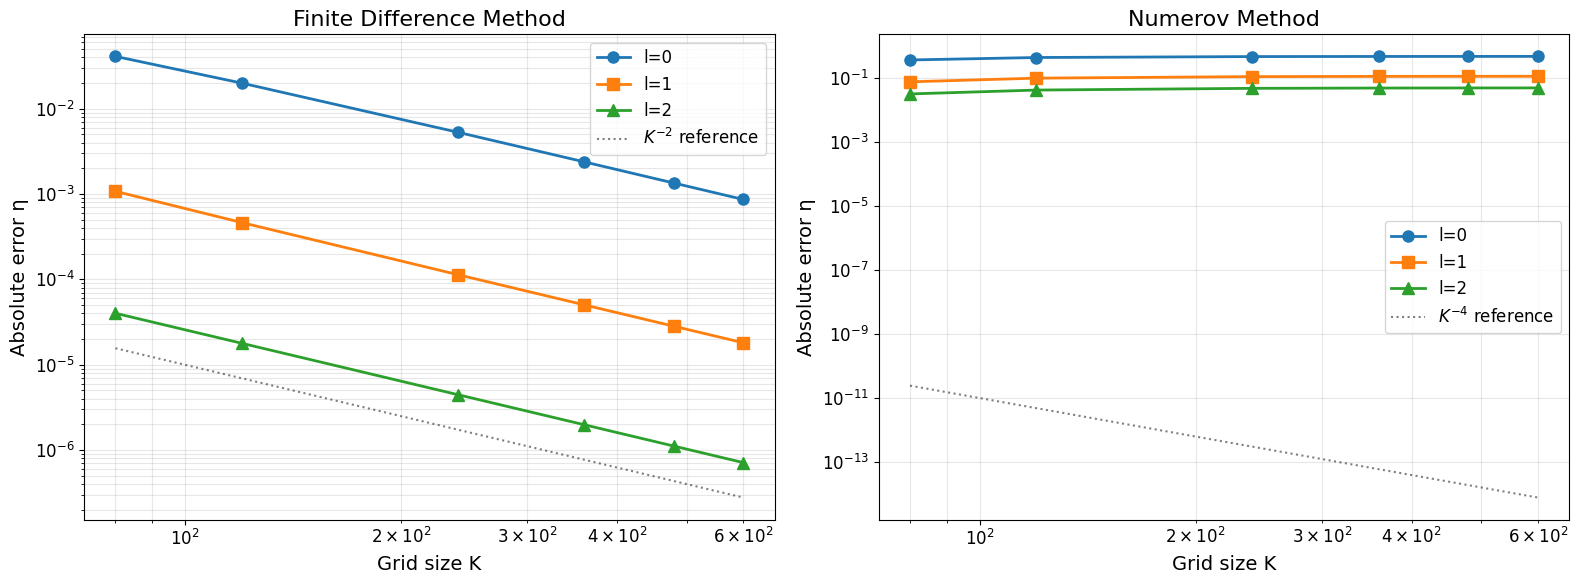

In [20]:
# Combined comparison plot for all l values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Finite Difference comparison
ax1.loglog(K_array, eta_fd_array, 'o-', label='l=0', markersize=8, linewidth=2)
ax1.loglog(K_array_l1, eta_fd_array_l1, 's-', label='l=1', markersize=8, linewidth=2)
ax1.loglog(K_array_l2, eta_fd_array_l2, '^-', label='l=2', markersize=8, linewidth=2)
ax1.loglog(K_fit, 0.1 * K_fit**(-2), ':', color='black', alpha=0.5, label='$K^{-2}$ reference')
ax1.set_xlabel('Grid size K', fontsize=14)
ax1.set_ylabel('Absolute error η', fontsize=14)
ax1.set_title('Finite Difference Method', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3, which='both')

# Numerov comparison
ax2.loglog(K_array, eta_numerov_array, 'o-', label='l=0', markersize=8, linewidth=2)
ax2.loglog(K_array_l1, eta_numerov_array_l1, 's-', label='l=1', markersize=8, linewidth=2)
ax2.loglog(K_array_l2, eta_numerov_array_l2, '^-', label='l=2', markersize=8, linewidth=2)
ax2.loglog(K_fit, 0.001 * K_fit**(-4), ':', color='black', alpha=0.5, label='$K^{-4}$ reference')
ax2.set_xlabel('Grid size K', fontsize=14)
ax2.set_ylabel('Absolute error η', fontsize=14)
ax2.set_title('Numerov Method', fontsize=16)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

## Discussion and Conclusions

### Agreement with Theory

1. **Finite Difference Method**: The convergence exponent $q$ should be approximately **2.0** for all values of $l$, as this method is second-order accurate in the grid spacing $h$.

2. **Numerov Method**: The convergence exponent $q$ should be approximately **4.0** for all values of $l$, as the Numerov method is fourth-order accurate.

### Dependence on Angular Momentum

The convergence exponent $q$ is a property of the **numerical method** itself, not the physics of the problem. Therefore:

- The value of $q$ should remain **constant** across different values of $l$
- Both methods maintain their respective convergence orders regardless of the centrifugal barrier strength

However, the **prefactor** $C$ in $\eta = C \times K^{-q}$ may change with $l$:

- For larger $l$, the centrifugal barrier $\frac{l(l+1)}{2r^2}$ becomes stronger
- This can affect the absolute magnitude of errors (the $C$ coefficient)
- The wavefunction behavior near $r=0$ becomes more regular with increasing $l$, which may actually improve accuracy

### Key Observations

1. **Numerov superiority**: For the same grid size $K$, the Numerov method achieves significantly smaller errors than finite difference, demonstrating the advantage of higher-order methods.

2. **Computational efficiency**: To achieve a target accuracy, Numerov requires far fewer grid points than finite difference, reducing computational cost.

3. **Robustness**: Both methods maintain their theoretical convergence rates across different angular momentum states, confirming their reliability for solving the radial Schrödinger equation.

### Physical Insight

The hydrogen atom energies follow $\epsilon_n = -1/(2n^2)$, and for the ground state of each $l$:
- $l=0$: $n=1$, $\epsilon = -0.500$ (most bound)
- $l=1$: $n=2$, $\epsilon = -0.125$ (less bound)
- $l=2$: $n=3$, $\epsilon = -0.056$ (least bound)

Higher angular momentum states are less tightly bound due to the repulsive centrifugal barrier.